In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pickle
from utils import load_data

## Load data

In [3]:
samples, n_samples, supp, action_values = load_data('./dssat_samples/dssat_mcgill_100000_MCGI100001_MG0001_samples_st_50.pkl')

idx = np.where(np.array(action_values) == 135)[0][0]

samples = samples[idx]
n = len(samples)

# "True" mean, taken as empirical means over the whole sample
mu = np.mean(samples)

# "True" standard deviation, taken as empirical std_dev over the whole sample
sigma = np.std(samples)

# Shuffle samples
samples = samples[np.random.rand(n).argsort()]
lower_bound, upper_bound = supp

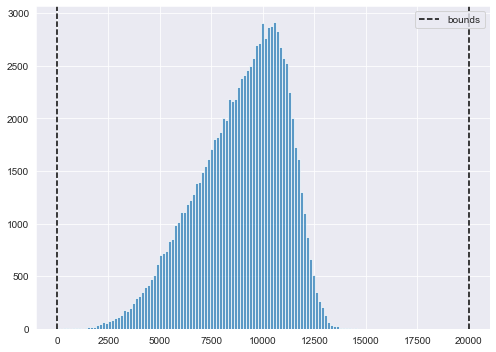

In [4]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)
    
    ax.hist(samples, bins=100, alpha=0.7)
    ax.axvline(x=lower_bound, color='black', linestyle='--')
    ax.axvline(x=upper_bound, color='black', linestyle='--', label='bounds')
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

## Normality test

In [5]:
from scipy.stats import jarque_bera, shapiro, normaltest

In [6]:
jarque_bera(samples)

Jarque_beraResult(statistic=5661.350284723833, pvalue=0.0)

In [7]:
shapiro(samples)

/home/sauxpa/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9711105227470398, pvalue=0.0)

In [8]:
normaltest(samples)

NormaltestResult(statistic=4948.254012686713, pvalue=0.0)

In [9]:
from scipy.stats import skew, kurtosis
[skew(samples), kurtosis(samples)]

[-0.5769016394356214, -0.1658807196043841]

## Concentration and boundary crossing

In [10]:
with open('results/DSSAT_769753.pkl', 'rb') as f:
    res = pickle.load(f)

In [11]:
N = res['info']['N']
M = res['info']['M']
delta = res['info']['delta']

mu_hats = res['results']['mu_hat']
student_bounds = res['results']['student']
bernstein_bounds = res['results']['bernstein']
bentkus_bounds = res['results']['bentkus']
hedged_capital_bounds = res['results']['hedged_capital']
ptlm_bounds = res['results']['ptlm']
bcp_student_bounds = res['results']['bcp_student']
bcp_bernstein_bounds = res['results']['bcp_bernstein']
bcp_bentkus_bounds = res['results']['bcp_bentkus']
bcp_hedged_capital_bounds = res['results']['bcp_hedged_capital']
bcp_ptlm_bounds = res['results']['bcp_ptlm']

mu_hat = np.mean(mu_hats, axis=1)

nn = np.linspace(1, N, N)

In [12]:
student_lower_bounds = mu_hats[:, :] - student_bounds[:, :, 0]
bernstein_lower_bounds = mu_hats[:, :] - bernstein_bounds[:, :, 0]
bentkus_lower_bounds = mu_hats[:, :] - bentkus_bounds[:, :, 0]
hedged_capital_lower_bounds = mu_hats[:, :] - hedged_capital_bounds[:, :, 0]
ptlm_lower_bounds = mu_hats[:, :] - ptlm_bounds[:, :, 0]
student_upper_bounds = mu_hats[:, :] + student_bounds[:, :, 1]
bernstein_upper_bounds = mu_hats[:, :] + bernstein_bounds[:, :, 1]
bentkus_upper_bounds = mu_hats[:, :] + bentkus_bounds[:, :, 1]
hedged_capital_upper_bounds = mu_hats[:, :] + hedged_capital_bounds[:, :, 1]
ptlm_upper_bounds = mu_hats[:, :] + ptlm_bounds[:, :, 1]

student_lower_bound = np.nanmean(student_lower_bounds, axis=1)
bernstein_lower_bound = np.nanmean(bernstein_lower_bounds, axis=1)
bentkus_lower_bound = np.nanmean(bentkus_lower_bounds, axis=1)
hedged_capital_lower_bound = np.nanmean(hedged_capital_lower_bounds, axis=1)
ptlm_lower_bound = np.nanmean(ptlm_lower_bounds, axis=1)
student_upper_bound = np.nanmean(student_upper_bounds, axis=1)
bernstein_upper_bound = np.nanmean(bernstein_upper_bounds, axis=1)
bentkus_upper_bound = np.nanmean(bentkus_upper_bounds, axis=1)
hedged_capital_upper_bound = np.nanmean(hedged_capital_upper_bounds, axis=1)
ptlm_upper_bound = np.nanmean(ptlm_upper_bounds, axis=1)

/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/home/

In [13]:
bcps_lo_student = bcp_student_bounds[:, :, 0]
bcps_lo_bernstein = bcp_bernstein_bounds[:, :, 0]
bcps_lo_bentkus = bcp_bentkus_bounds[:, :, 0]
bcps_lo_hedged_capital = bcp_hedged_capital_bounds[:, :, 0]
bcps_lo_ptlm = bcp_ptlm_bounds[:, :, 0]

bcp_lo_student = np.nanmean(bcps_lo_student, axis=1)
bcp_lo_bernstein = np.nanmean(bcps_lo_bernstein, axis=1)
bcp_lo_bentkus = np.nanmean(bcps_lo_bentkus, axis=1)
bcp_lo_hedged_capital = np.nanmean(bcps_lo_hedged_capital, axis=1)
bcp_lo_ptlm = np.nanmean(bcps_lo_ptlm, axis=1)

bcps_hi_student = bcp_student_bounds[:, :, 1]
bcps_hi_bernstein = bcp_bernstein_bounds[:, :, 1]
bcps_hi_bentkus = bcp_bentkus_bounds[:, :, 1]
bcps_hi_hedged_capital = bcp_hedged_capital_bounds[:, :, 1]
bcps_hi_ptlm = bcp_ptlm_bounds[:, :, 1]

bcp_hi_student = np.nanmean(bcps_hi_student, axis=1)
bcp_hi_bernstein = np.nanmean(bcps_hi_bernstein, axis=1)
bcp_hi_bentkus = np.nanmean(bcps_hi_bentkus, axis=1)
bcp_hi_hedged_capital = np.nanmean(bcps_hi_hedged_capital, axis=1)
bcp_hi_ptlm = np.nanmean(bcps_hi_ptlm, axis=1)

bcps_student = np.logical_or(bcp_student_bounds[:, :, 0], bcp_student_bounds[:, :, 1])
bcps_bernstein = np.logical_or(bcp_bernstein_bounds[:, :, 0], bcp_bernstein_bounds[:, :, 1])
bcps_bentkus = np.logical_or(bcp_bentkus_bounds[:, :, 0], bcp_bentkus_bounds[:, :, 1])
bcps_hedged_capital = np.logical_or(bcp_hedged_capital_bounds[:, :, 0], bcp_hedged_capital_bounds[:, :, 1])
bcps_ptlm = np.logical_or(bcp_ptlm_bounds[:, :, 0], bcp_ptlm_bounds[:, :, 1])

bcp_student = np.nanmean(bcps_student, axis=1)
bcp_bernstein = np.nanmean(bcps_bernstein, axis=1)
bcp_bentkus = np.nanmean(bcps_bentkus, axis=1)
bcp_hedged_capital = np.nanmean(bcps_hedged_capital, axis=1)
bcp_ptlm = np.nanmean(bcps_ptlm, axis=1)

/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/home/sauxpa/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: Ru

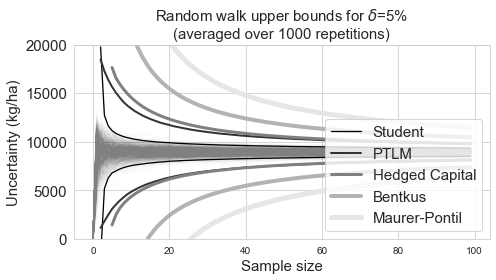

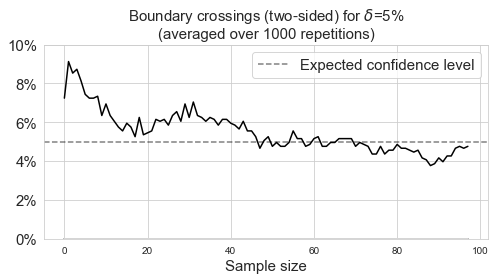

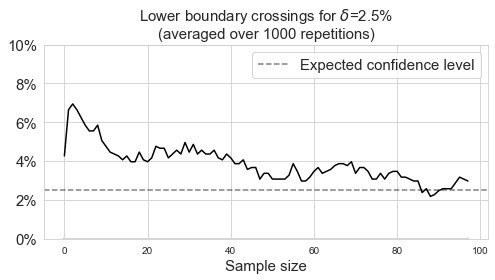

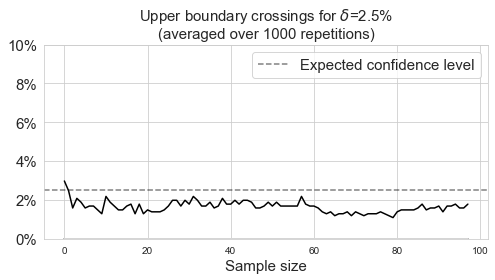

In [14]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(7, 4), nrows=1, ncols=1)

    ax.plot(mu_hats, color='grey', alpha=0.01)
#     ax.axhline(y=mu, color='black', linestyle='dotted', linewidth=2)
    
    ax.plot(student_lower_bound, color='0', linewidth=1.3, label='Student')
    ax.plot(student_upper_bound, color='0', linewidth=1.3)
    ax.plot(ptlm_lower_bound, color='0.2', linewidth=2, label='PTLM')
    ax.plot(ptlm_upper_bound, color='0.2', linewidth=2)
    ax.plot(hedged_capital_lower_bound, color='0.5', linewidth=3, label='Hedged Capital')
    ax.plot(hedged_capital_upper_bound, color='0.5', linewidth=3)
    ax.plot(bentkus_lower_bound, color='0.7', linewidth=4, label='Bentkus')
    ax.plot(bentkus_upper_bound, color='0.7', linewidth=4)
    ax.plot(bernstein_lower_bound, color='0.9', linewidth=5, label='Maurer-Pontil')
    ax.plot(bernstein_upper_bound, color='0.9', linewidth=5)
    
    ax.set_xlabel('Sample size', fontsize=15)
    ax.set_ylabel('Uncertainty (kg/ha)', fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylim([lower_bound, upper_bound])
    ax.legend(loc='lower right', prop={'size': 15})
    ax.set_title('Random walk upper bounds for $\delta$={:.0%}\n(averaged over {:.0f} repetitions)'.format(delta, M), fontsize=15)
    
    plt.tight_layout()
    plt.show()
    fig.savefig('dssat_concentration_bounds.pdf', format='pdf', dpi=300)
    
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(7, 4), nrows=1, ncols=1)
    
    ax.axhline(y=delta, color='black', linestyle='dashed', label='Expected confidence level', alpha=0.5)
    ax.plot(bcp_student[2:], color='0')
    ax.plot(bcp_ptlm[2:], color='0.2')
    ax.plot(bcp_hedged_capital[2:], color='0.5')
    ax.plot(bcp_bentkus[2:], color='0.7')
    ax.plot(bcp_bernstein[2:], color='0.9')
    
    ax.set_xlabel('Sample size', fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylim([0.0, 0.1])
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.legend(loc='upper right', prop={'size': 15})
    ax.set_title('Boundary crossings (two-sided) for $\delta$={:.0%}\n(averaged over {:.0f} repetitions)'.format(delta, M), fontsize=15)
    
    plt.tight_layout()
    plt.show()
    fig.savefig('dssat_concentration_boundary_crossings.pdf', format='pdf', dpi=300)

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(7, 4), nrows=1, ncols=1)
    
    ax.axhline(y=delta / 2, color='black', linestyle='dashed', label='Expected confidence level', alpha=0.5)
    ax.plot(bcp_lo_student[2:], color='0')
    ax.plot(bcp_lo_ptlm[2:], color='0.2')
    ax.plot(bcp_lo_hedged_capital[2:], color='0.5')
    ax.plot(bcp_lo_bentkus[2:], color='0.7')
    ax.plot(bcp_lo_bernstein[2:], color='0.9')

    ax.set_xlabel('Sample size', fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylim([0.0, 0.1])
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.legend(loc='upper right', prop={'size': 15})
    ax.set_title('Lower boundary crossings for $\delta$={:.1%}\n(averaged over {:.0f} repetitions)'.format(delta/2, M), fontsize=15)
    
    plt.tight_layout()
    plt.show()
    fig.savefig('dssat_concentration_lower_boundary_crossings.pdf', format='pdf', dpi=300)

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(7, 4), nrows=1, ncols=1)
    
    ax.axhline(y=delta / 2, color='black', linestyle='dashed', label='Expected confidence level', alpha=0.5)
    ax.plot(bcp_hi_student[2:], color='0', )
    ax.plot(bcp_hi_ptlm[2:], color='0.2')
    ax.plot(bcp_hi_hedged_capital[2:], color='0.5')
    ax.plot(bcp_hi_bentkus[2:], color='0.7')
    ax.plot(bcp_hi_bernstein[2:], color='0.9')

    ax.set_xlabel('Sample size', fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylim([0.0, 0.1])
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.legend(loc='upper right', prop={'size': 15})
    ax.set_title('Upper boundary crossings for $\delta$={:.1%}\n(averaged over {:.0f} repetitions)'.format(delta/2, M), fontsize=15)
    
    plt.tight_layout()
    plt.show()
    fig.savefig('dssat_concentration_upper_boundary_crossings.pdf', format='pdf', dpi=300)